# Comp4331 Assignment 1

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd "/content/drive/MyDrive/HKUST/COMP 4331"

/content/drive/MyDrive/HKUST/COMP 4331


## Preparing the dataset

In [9]:

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn import preprocessing


In [5]:
# Please ensure the file "forestfires.csv" is under current directory
data_file = "forestfires.csv"

In [6]:
data_df = pd.read_csv(data_file, sep=',')

In [7]:
data_df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


## Task 1. Basic summary

In [8]:
data_df[["RH",	"wind"]].describe()

,RH,wind
count,517.000000,517.000000
mean,44.288201,4.017602
std,16.317469,1.791653
min,15.000000,0.400000
25%,33.000000,2.700000
50%,42.000000,4.000000
75%,53.000000,4.900000
max,100.000000,9.400000


## Task 2. Box plot

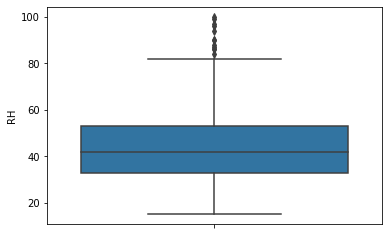

In [10]:
sns.boxplot(y=data_df["RH"])


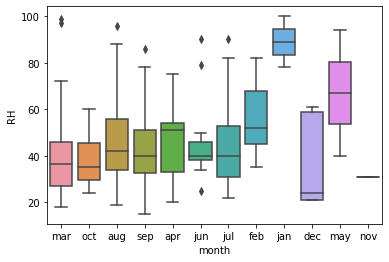

In [11]:
sns.boxplot(y=data_df["RH"], x=data_df["month"])

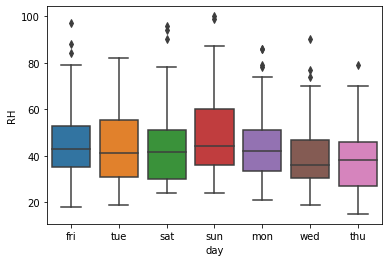

In [12]:
sns.boxplot(y=data_df["RH"], x=data_df["day"])

## Task 3. Hist plot

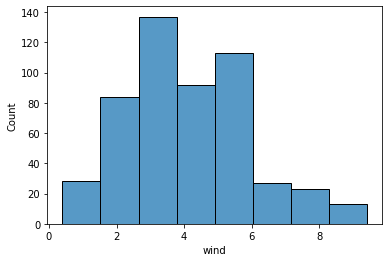

In [ ]:
sns.histplot(data_df["wind"], bins=8)

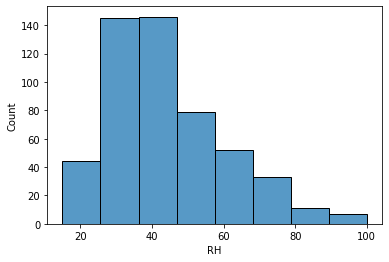

In [ ]:
sns.histplot(data_df["RH"], bins=8)

# Task 4. Scatter plot

(0.012317276888673095, 0.7799390703616983)

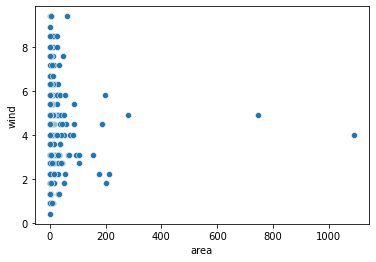

In [ ]:
sns.scatterplot(x="area", y="wind", data=data_df)
scipy.stats.pearsonr(data_df["area"],data_df["wind"])

Correlation Coefficient between `wind` and `area` 0.0123

## Task 5. Correlation

In [ ]:
hashmap = {}
for att in ["FFMC", "DMC", "DC", "ISI", "RH", "wind"]:
  hashmap[att] = scipy.stats.pearsonr(data_df["area"],data_df[att])[0]
print("Top 3  attributes that are most correlated with `area`")
sorted(hashmap.items(), key=lambda item: abs(item[1]), reverse=True)[:3]

Top 3  attributes that are most correlated with `area`


[('RH', -0.07551856346988922),
 ('DMC', 0.07299429625105729),
 ('DC', 0.04938322529891621)]

# Task 6. $\chi^2$-test



In [ ]:
temp_mean = data_df["temp"].mean()
wind_mean = data_df["wind"].mean()

temp_ge_mean = data_df["temp"] >= temp_mean
wind_ge_mean = data_df["wind"] >= wind_mean
crosstab = pd.crosstab(temp_ge_mean, wind_ge_mean)

print(crosstab)
chi2, p, dof, _ = scipy.stats.chi2_contingency(crosstab)
print()
print(f"chi^2: {chi2}, p: {p}, dof: {dof}")

wind   False  True
temp              
False    125   112
True     175   105

chi^2: 4.6248223286218, p: 0.031512524845180044, dof: 1


Since p-value > 0.01, `temp` and `wind` are independent of each other.

In [ ]:
x_mean = data_df["X"].mean()
y_mean = data_df["Y"].mean()

x_ge_mean = data_df["X"] >= x_mean
y_ge_mean = data_df["Y"] >= y_mean
crosstab = pd.crosstab(x_ge_mean, y_ge_mean)

print(crosstab)
chi2, p, dof, _ = scipy.stats.chi2_contingency(crosstab)
print()
print(f"chi^2: {chi2}, p: {p}, dof: {dof}")

Y      False  True
X                 
False    199    68
True     112   138

chi^2: 46.3841585605598, p: 9.719816977512204e-12, dof: 1


Since p-value <<< 0.01, `X` and `Y` are not independent of each other.

## Task 7. Normalization

#### a)

In [13]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_df["normalized_FFMC"] = scaler.fit_transform(data_df[["FFMC"]])

data_df


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,normalized_FFMC
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.870968
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.927742
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.927742
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.941935
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.910968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.811613
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.811613
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.811613
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.976774


#### b)

In [17]:
scaler = preprocessing.StandardScaler()
for att in ["DC", "ISI", "temp", "RH", "wind"]:
  data_df[f"normalized_{att}"] = scaler.fit_transform(data_df[[att]])

data_df.iloc[:, -5:]

,normalized_DC,normalized_ISI,normalized_temp,normalized_RH,normalized_wind
0,-1.830477,-0.860946,-1.842640,0.411724,1.498614
1,0.488891,-0.509688,-0.153278,-0.692456,-1.741756
2,0.560715,-0.509688,-0.739383,-0.692456,-1.518282
3,-1.898266,-0.004756,-1.825402,3.233519,-0.009834
4,-1.798600,0.126966,-1.291012,3.356206,-1.238940
...,...,...,...,...,...
512,0.474768,-1.563460,1.536084,-0.753800,-0.736124
513,0.474768,-1.563460,0.519019,1.638592,0.995798
514,0.474768,-1.563460,0.398350,1.577248,1.498614
515,0.269382,0.500176,1.156839,-0.140366,-0.009834


In [15]:
d = data_df.iloc[:, -6:]
d

,normalized_FFMC,normalized_DC,normalized_ISI,normalized_temp,normalized_RH,normalized_wind
0,0.870968,-1.830477,-0.860946,-1.842640,0.411724,1.498614
1,0.927742,0.488891,-0.509688,-0.153278,-0.692456,-1.741756
2,0.927742,0.560715,-0.509688,-0.739383,-0.692456,-1.518282
3,0.941935,-1.898266,-0.004756,-1.825402,3.233519,-0.009834
4,0.910968,-1.798600,0.126966,-1.291012,3.356206,-1.238940
...,...,...,...,...,...,...
512,0.811613,0.474768,-1.563460,1.536084,-0.753800,-0.736124
513,0.811613,0.474768,-1.563460,0.519019,1.638592,0.995798
514,0.811613,0.474768,-1.563460,0.398350,1.577248,1.498614
515,0.976774,0.269382,0.500176,1.156839,-0.140366,-0.009834


In [16]:
d.to_csv("data_normalized.csv", sep=',')

## Task 8. PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df = data_df.iloc[:, -5:]
df

,normalized_DC,normalized_ISI,normalized_temp,normalized_RH,normalized_wind
0,-1.830477,-0.860946,-1.842640,0.411724,1.498614
1,0.488891,-0.509688,-0.153278,-0.692456,-1.741756
2,0.560715,-0.509688,-0.739383,-0.692456,-1.518282
3,-1.898266,-0.004756,-1.825402,3.233519,-0.009834
4,-1.798600,0.126966,-1.291012,3.356206,-1.238940
...,...,...,...,...,...
512,0.474768,-1.563460,1.536084,-0.753800,-0.736124
513,0.474768,-1.563460,0.519019,1.638592,0.995798
514,0.474768,-1.563460,0.398350,1.577248,1.498614
515,0.269382,0.500176,1.156839,-0.140366,-0.009834


In [ ]:
pca = PCA()

In [ ]:
PrincipalComponents = pca.fit_transform(df)

explain_ratio [0.4  0.63 0.82 0.95 1.  ]


Text(0.5, 0, 'Number of Principal Components')

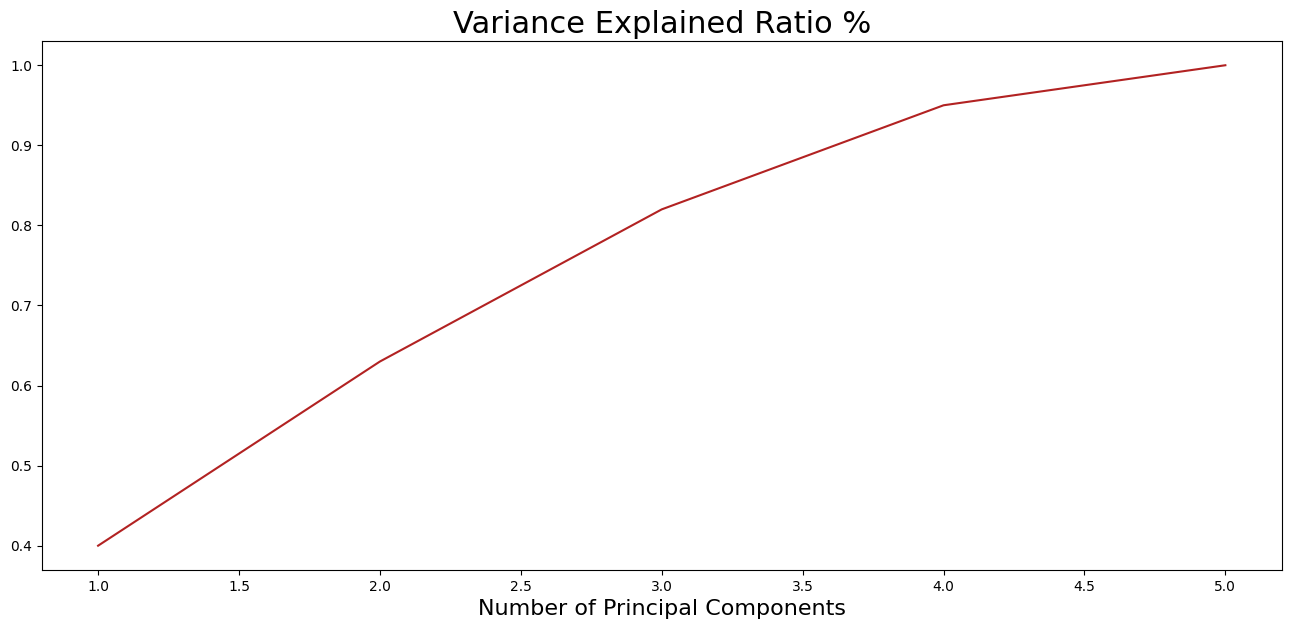

In [ ]:
explain_ratio = pca.explained_variance_ratio_.cumsum().round(2)
print('explain_ratio', explain_ratio)

fig, axes = plt.subplots(1,1, figsize=(16,7), dpi=100)
plt.plot(range(1,len(explain_ratio)+1), explain_ratio, color='firebrick')
plt.title('Variance Explained Ratio %', fontsize=22)
plt.xlabel('Number of Principal Components', fontsize=16)


Minimum number of coefficient > 0.9 = 4

In [ ]:
pca = PCA(n_components=4)
PrincipalComponents = pca.fit_transform(df)
PrincipalComponents

numpy.ndarray

In [ ]:
reduced_df = pd.DataFrame(
    PrincipalComponents,
    columns = ["PC1", "PC2", "PC3", "PC4"]
)
reduced_df

,PC1,PC2,PC3,PC4
0,2.870774,1.038181,-0.737692,-0.148180
1,-0.611544,-1.673690,-0.506513,0.295610
2,-0.217798,-1.520256,-0.397966,0.191054
3,3.400801,-0.095649,1.557776,1.614286
4,2.735682,-1.035390,1.632195,2.279629
...,...,...,...,...
512,-1.085062,-1.406382,-1.035174,-1.073109
513,0.956559,-0.390165,0.953937,-1.608747
514,1.121435,0.017789,0.946739,-1.879873
515,-1.121593,0.243434,0.103437,0.045067


In [ ]:
reduced_df.to_csv("data_reduced.csv", sep=',', header=False)

In [ ]:
reduced_df.describe().applymap(lambda x: f"{x:0.3f}")

,PC1,PC2,PC3,PC4
count,517.000,517.000,517.000,517.000
mean,-0.000,0.000,0.000,0.000
std,1.421,1.055,0.993,0.790
min,-3.511,-2.668,-2.685,-1.945
25%,-0.954,-0.813,-0.646,-0.477
50%,-0.315,-0.140,0.017,-0.055
75%,0.902,0.761,0.632,0.481
max,4.430,6.145,3.628,7.020


## Task 9. Missing values

reloading the dataset

In [ ]:
data_df = pd.read_csv(data_file, sep=',')

In [ ]:
nonzero_mean = data_df["area"][~(data_df["area"]==0)].mean()
nonzero_mean

24.600185185185182

In [ ]:
data_df["area"][(data_df["area"]==0)] = nonzero_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_df["area"]

0      24.600185
1      24.600185
2      24.600185
3      24.600185
4      24.600185
         ...    
512     6.440000
513    54.290000
514    11.160000
515    24.600185
516    24.600185
Name: area, Length: 517, dtype: float64

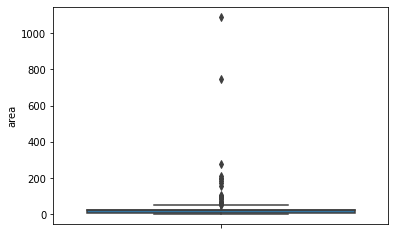

In [ ]:
sns.boxplot(y=data_df["area"])

(0.0015841333760411112, 0.9713363545480177)

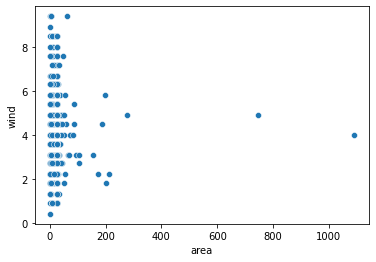

In [ ]:
sns.scatterplot(x="area", y="wind", data=data_df)
scipy.stats.pearsonr(data_df["area"],data_df["wind"])

Their corrleation went down from 0.0123 to 0.0016.
Which weakened the significance of null hypothesis.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [19]:
!jupyter nbconvert --to PDF '/content/drive/MyDrive/HKUST/COMP 4331/assignment1.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/HKUST/COMP 4331/assignment1.ipynb to PDF
[NbConvertApp] Support files will be in assignment1_files/
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Making directory ./assignment1_files
[NbConvertApp] Writing 59871 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writi